In [2]:
import numpy as np
import pandas as pd

columns = ['name','sex','births']
pieces = []

for year in range(1880,2011):
    frame = pd.read_csv("../babynames/yob%d.txt" % year , names=columns)
    pieces.append(frame)

    frame['year'] = year

print(len(pieces))

names = pd.concat(pieces, ignore_index=True)
names

131


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [19]:
# 1. 가장많이 사용된 알파벳 문자 구하기 (전체, 성별)

alphabet = names.name.str.split("")
alphabet.value_counts()

In [27]:
# 2. 이름 첫 글자 유행분석 -> 비율로 한번더 해보기

g1 = names.groupby(['year','name'])['births'].sum().reset_index()

g1['first'] = g1.name.str[0]
table = g1.pivot_table('births', index='year' , columns='first', aggfunc=sum)

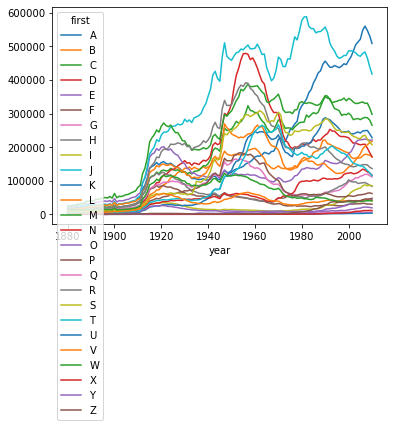

In [34]:
import matplotlib as plt

table.plot()

In [39]:
# 3. 연도별 성별에 따른 이름의 평균 글자 길이 구히고 시각화 하시오 

names.groupby(['year','sex'])['name'].unique().reset_index()

,year,sex,name
0,1880,F,"[Mary, Anna, Emma, Elizabeth, Minnie, Margaret..."
1,1880,M,"[John, William, James, Charles, George, Frank,..."
2,1881,F,"[Mary, Anna, Emma, Elizabeth, Margaret, Minnie..."
3,1881,M,"[John, William, James, George, Charles, Frank,..."
4,1882,F,"[Mary, Anna, Emma, Elizabeth, Minnie, Margaret..."
...,...,...,...
257,2008,M,"[Jacob, Michael, Ethan, Joshua, Daniel, Alexan..."
258,2009,F,"[Isabella, Emma, Olivia, Sophia, Ava, Emily, M..."
259,2009,M,"[Jacob, Ethan, Michael, Alexander, William, Jo..."
260,2010,F,"[Isabella, Sophia, Emma, Olivia, Ava, Emily, A..."


In [40]:
lenfunc = lambda x: len(x)

names['len'] = names.name.map(lenfunc)
names

,name,sex,births,year,len
0,Mary,F,7065,1880,4
1,Anna,F,2604,1880,4
2,Emma,F,2003,1880,4
3,Elizabeth,F,1939,1880,9
4,Minnie,F,1746,1880,6
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,7
1690780,Zyonne,M,5,2010,6
1690781,Zyquarius,M,5,2010,9
1690782,Zyran,M,5,2010,5


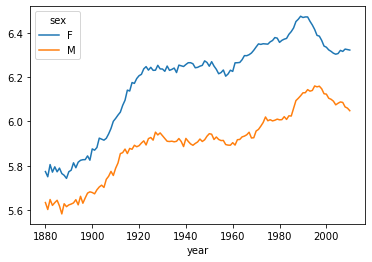

In [48]:
#y_s_group = names.groupby(['year','sex'])['birth'].sum()
lengroup = names.groupby(['year','sex'])['len'].mean().reset_index()

table3 = lengroup.pivot_table('len', index='year', columns='sex')
table3.plot()

In [57]:
# 4. 모음 변화 분석하기(a,e,i,o,u) 이름을 구성하는 문자중에서 모음의 비율 변화
#findvow = lambda x : x.count(['a','e','i','o','u']) # 안됨

def findvow(s):
    vc = 0
    for v in ('A','E','I','O','U','a','e','i','o','u'):
        vc += s.count(v)
    return vc


names['vow'] = names.name.map(findvow)
names

,name,sex,births,year,len,vow
0,Mary,F,7065,1880,4,1
1,Anna,F,2604,1880,4,2
2,Emma,F,2003,1880,4,2
3,Elizabeth,F,1939,1880,9,4
4,Minnie,F,1746,1880,6,3
...,...,...,...,...,...,...
1690779,Zymaire,M,5,2010,7,3
1690780,Zyonne,M,5,2010,6,2
1690781,Zyquarius,M,5,2010,9,4
1690782,Zyran,M,5,2010,5,1


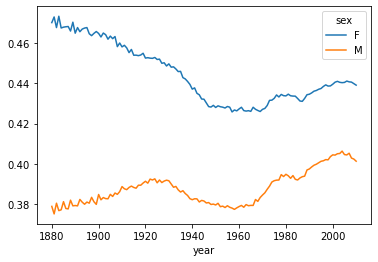

In [161]:
def add_vowProp(group): #그룹화된 객체가 전달됨
    group['vowprop'] = group.vow.sum()/group.len.sum()
    return group

names2 = names.groupby(['year','sex']).apply(add_vowProp)
names2
table4 = names2.pivot_table('vowprop', index='year', columns='sex')
table4.plot()

In [99]:
# 5. 각 연도별 가장 인기있는 이름들을 추출하여 파일로 저장하시오

def addProp(group):
    group['prop'] = group.births/group.births.sum()
    return group

g5 = names.groupby(['year','sex']).apply(addProp)
# g5.groupby(['year','sex'])['prop'].max().reset_index()

,year,sex,prop
0,1880,F,0.077643
1,1880,M,0.087381
2,1881,F,0.075243
3,1881,M,0.087039
4,1882,F,0.075558
...,...,...,...
257,2008,M,0.011075
258,2009,F,0.012159
259,2009,M,0.010660
260,2010,F,0.012923


In [163]:
def getTop1(group): #그룹단위로 getTop1000 함수가 적용된다
    return group.sort_values('births', ascending = False)[:1] #내림차순 sort #1000건씩 출력

top1 = g5.groupby(['year','sex']).apply(getTop1)
aa=top1['name'].reset_index()
bb = aa.pivot_table('name', index='year',columns='sex',aggfunc='first')
bb.columns = ['F','M']
bb.to_csv("favoriteNames.csv",encoding = 'utf-8')
# toptable = top1.drop(['len','vow','year','sex','births','prop'], axis = 1)
# toptable = toptable.reset_index()
# toptable = toptable.drop(['level_2'], axis = 1)
# toptable
# toptable.pivot_table('name', index='year',columns='sex',aggfunc='first')
#top1.to_csv("favoriteNames.csv",encoding = 'utf-8')

In [ ]:
a.max(axis=0)
a.max(axis=0).max()
a.max(axis=0).idxmax()
a.max(axis=1).idxmax()